In [932]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator

In [933]:
def heatmap(df_1):
    num_of_columns = df_1.shape[1] 
    df_1 = df_1.drop(df_1.columns[[num_of_columns - 1]], axis = 1)
    corr_matrix = df_1.corr()
    styled_df = corr_matrix.style.background_gradient(cmap='coolwarm')
    return display(styled_df)

In [934]:
def cross_corr_graph(df):
    num_of_columns = len(df.columns)
    for i in range(num_of_columns - 1):
        column_data = df.iloc[:, i]
        ax = column_data.plot(y = df.iloc[:, i].name, marker = 'o', linestyle='-', markersize=2, linewidth=0.5)
        plt.xticks(rotation=90)
        ax.xaxis.set_major_locator(MultipleLocator(base= 1))
        ax.set_xticks(range(len(df)))
        ax.set_xticklabels(df.index, rotation=90, fontsize=6)
        plt.tick_params(axis='x', labelsize=6)
        plt.title(f'График кросс-корреляции для {df.iloc[:, i].name}') 
        plt.show()

In [935]:
data = np.load('Data_First_ver.npz', allow_pickle=True)

In [936]:
all_X  = data['all_X_2']
all_Y  = data['all_Y_2']

In [937]:
x_train, x_test, y_train, y_test = train_test_split(all_X, all_Y, test_size=0.25, random_state=42)

In [938]:
df_X1 = pd.read_csv(r'raw_X1.csv', index_col=0)
df_X2 = pd.read_csv(r'raw_X2.csv', index_col=0)
df_X3 = pd.read_csv(r'raw_X3.csv', index_col=0)
df_Y1 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y2 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y3 = pd.read_csv(r'raw_Y1.csv', index_col=0)

In [939]:
df_X = df_X2
df_Y = df_Y2

In [940]:
threshhold = 0.15

In [942]:
def preparation_1(arr_1, df_x):
    df1 = pd.DataFrame(arr_1)
    num_of_columns = df1.shape[1]
    df_x.drop(df_x.columns[[num_of_columns - 1]], axis = 1, inplace = True)
    return df_x

В 1 данных не совпадает количество столбцов в нпз и csv, какой потерялся - не вычислил. Для них код с подготовкой не запустится 

In [943]:
df1 = preparation_1(all_X, df_X)

In [945]:
column_names_X1 = df_X1.columns.tolist()
column_names_X2 = df_X2.columns.tolist()
column_names_X3 = df_X3.columns.tolist()
column_name_Y1 = 'Давление насыщенных паров в зимний период'
column_name_Y2 = 'Конец кипения легкого бензина'
column_name_Y3 = 'Содержание олефинов в продукте'

In [946]:
column_names_X = column_names_X2
column_name_Y = column_name_Y2

In [947]:
class Correlation_Visualize():
    def __init__(self):
        pass
    def Correlation_Getter(self, df1, arr_2, column_name_Y, df_x, df_y, corr_type, temp):
        
    
        df2 = pd.DataFrame(arr_2)
        df2.drop(df2.columns[[1]], axis = 1, inplace = True)
    
        column_names_x = df_x.columns.tolist()
        df1.columns = column_names_x
    
        added_column_name = [column_name_Y]
        df2.columns = added_column_name
    
        df1[column_name_Y] = df2[column_name_Y]
        correlation = (df1.corr()[column_name_Y])
        del correlation[column_name_Y]
        sorted_all = correlation.sort_values(ascending=True)
        significant_correlations = correlation[(correlation > temp) | (correlation < -temp)]
        sorted_significant_correlations = significant_correlations.sort_values(ascending=True)
        if corr_type == 'all':
            return sorted_all
        else:
            return sorted_significant_correlations
    
    def Cross_Corr(self, temp):
        corr_temp = temp
        significant_columns = self.Correlation_Getter(df1, all_Y, column_name_Y, df_X, df_Y, 'best', corr_temp).index.tolist()
        significant_df = df1[significant_columns]
        cross_correlation_matrix = significant_df.corr()
        return cross_correlation_matrix

    def Best_Corr(self, temp):
        corr_temp = temp
        df = pd.DataFrame(self.Correlation_Getter(df1, all_Y, column_name_Y, df_X, df_Y, 'best', corr_temp))
        return df
    
    def Correlation_Visualizer(self, temp):
        corr_temp = temp
        return (self.Correlation_Getter(df1, all_Y, column_name_Y, df_X, df_Y, 'all', corr_temp).plot(kind='barh',color = "darkgreen", figsize = (100,90), fontsize=50),
            plt.title("Коэффициенты корреляции для " +'"'+ column_name_Y + '"'+ 'по всей выборке', fontsize=50), 
            plt.axvline(x = corr_temp, ymin = 0, ymax = 1,
            linewidth = 5, linestyle ="--",
            color ='#da1934'),
            plt.axvline(x = -corr_temp, ymin = 0, ymax = 1,
            linewidth = 5, linestyle ="--",
            color ='#da1934'))
    
        

In [948]:
test_viz = Correlation_Visualize()

In [949]:
test_viz.Correlation_Visualizer(threshhold)

(<Axes: title={'center': 'Коэффициенты корреляции для "Конец кипения легкого бензина"по всей выборке'}>,
 Text(0.5, 1.0, 'Коэффициенты корреляции для "Конец кипения легкого бензина"по всей выборке'),
 <matplotlib.lines.Line2D at 0x13b410616d0>)

In [950]:
display(test_viz.Best_Corr(threshhold))

,Конец кипения легкого бензина
Температура пара на ребойлеры Е-1105,-0.312840
Перепад давления реактора R-1101,-0.262110
Показатель соотношения водород к углероду,-0.231525
Температура окружающей среды,-0.205672
Давление в емкости V-1102,-0.193975
Температура сырья перед Е-1101,-0.189957
Давление ЛБ после АВО А-1101,-0.187128
Температура на входе в С-1101,-0.171091
Температура бензина ККР на установку,-0.166325
Давление верха С-1101,-0.153274


In [951]:
heatmap(test_viz.Cross_Corr(threshhold))

,Температура пара на ребойлеры Е-1105,Перепад давления реактора R-1101,Показатель соотношения водород к углероду,Температура окружающей среды,Давление в емкости V-1102,Температура сырья перед Е-1101,Давление ЛБ после АВО А-1101,Температура на входе в С-1101,Температура бензина ККР на установку,Давление верха С-1101,Давление продукта на выходе с установки,Уровень куба С-1101,Расход ТБ с куба С-1101,Давление ВСГ на выходе из К-1201В,Давление сырья перед Е-1101,Расход продукта на выходе с установки,Расход пара на ребойлеры Е-1105
Температура пара на ребойлеры Е-1105,1.000000,-0.955079,0.917358,-0.021590,0.133642,0.937404,-0.012209,0.967381,0.940729,0.348148,-0.858711,-0.951232,0.955151,0.906514,0.972136,0.925105,0.925105
Перепад давления реактора R-1101,-0.955079,1.000000,-0.894560,-0.105890,-0.112335,-0.941100,0.033445,-0.952571,-0.939801,-0.330337,0.849456,0.927748,-0.946427,-0.904108,-0.968517,-0.893953,-0.893953
Показатель соотношения водород к углероду,0.917358,-0.894560,1.000000,-0.074616,-0.056398,0.895052,-0.195475,0.967563,0.910908,0.178223,-0.863833,-0.947345,0.934550,0.873238,0.960836,0.950102,0.950102
Температура окружающей среды,-0.021590,-0.105890,-0.074616,1.000000,-0.321358,0.225241,-0.277033,-0.016091,0.186639,-0.255134,0.019577,-0.030554,-0.016495,-0.055675,0.005850,-0.001906,-0.001906
Давление в емкости V-1102,0.133642,-0.112335,-0.056398,-0.321358,1.000000,0.129278,0.981542,0.129635,0.133773,0.964996,-0.071820,-0.118106,0.166321,0.139977,0.110985,0.086749,0.086749
Температура сырья перед Е-1101,0.937404,-0.941100,0.895052,0.225241,0.129278,1.000000,0.002122,0.961230,0.998210,0.362591,-0.849381,-0.953740,0.944938,0.867440,0.962100,0.930283,0.930283
Давление ЛБ после АВО А-1101,-0.012209,0.033445,-0.195475,-0.277033,0.981542,0.002122,1.000000,-0.014678,0.005082,0.926226,0.087534,0.022095,0.033624,0.010742,-0.037010,-0.032780,-0.032780
Температура на входе в С-1101,0.967381,-0.952571,0.967563,-0.016091,0.129635,0.961230,-0.014678,1.000000,0.971567,0.360263,-0.881494,-0.980689,0.982425,0.906066,0.997348,0.971299,0.971299
Температура бензина ККР на установку,0.940729,-0.939801,0.910908,0.186639,0.133773,0.998210,0.005082,0.971567,1.000000,0.369086,-0.851861,-0.960430,0.956664,0.865909,0.970514,0.946340,0.946340
Давление верха С-1101,0.348148,-0.330337,0.178223,-0.255134,0.964996,0.362591,0.926226,0.360263,0.369086,1.000000,-0.242875,-0.345965,0.400955,0.342316,0.339916,0.332099,0.332099


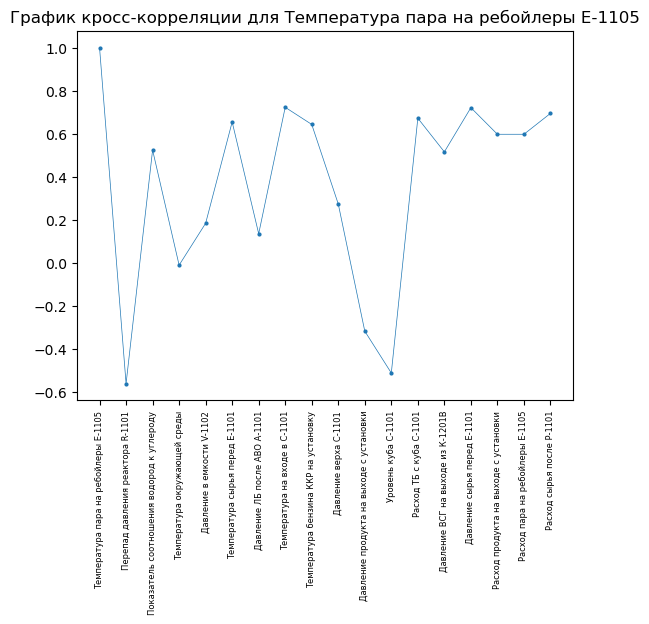

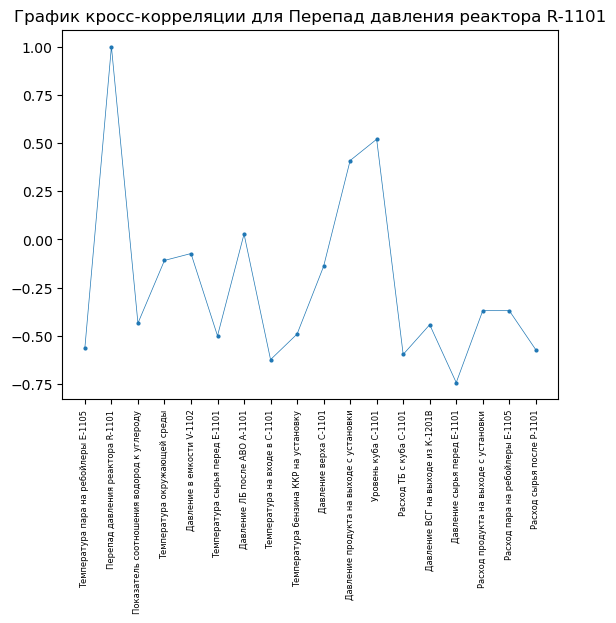

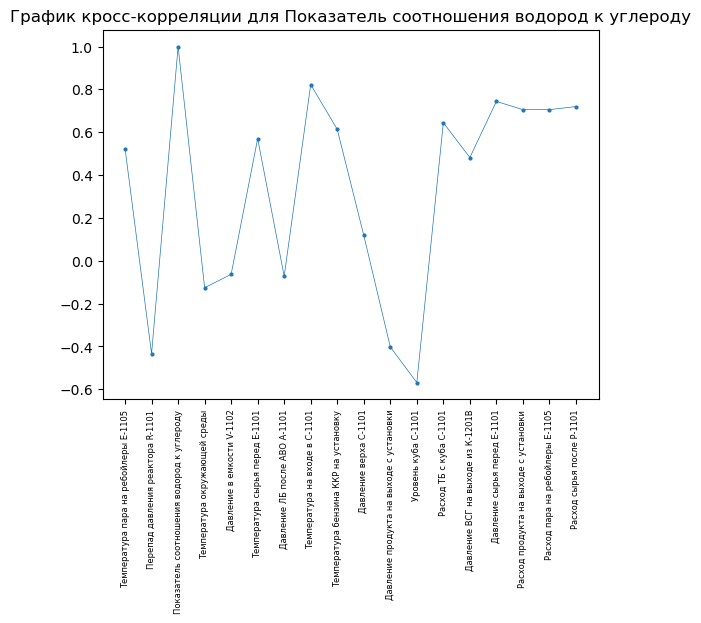

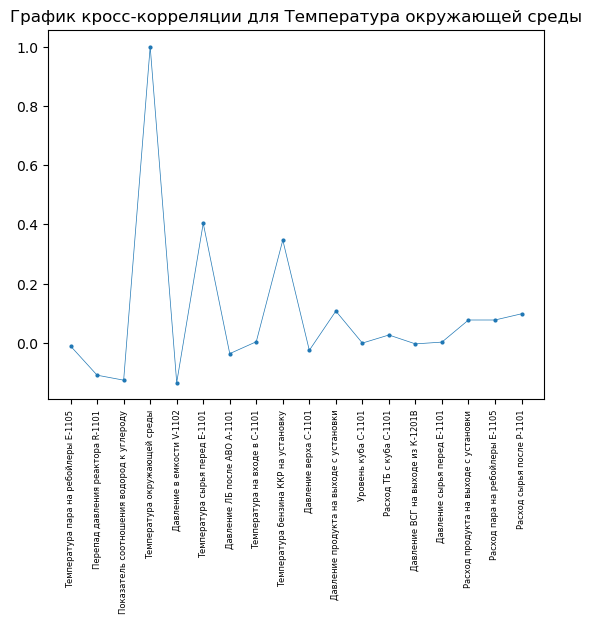

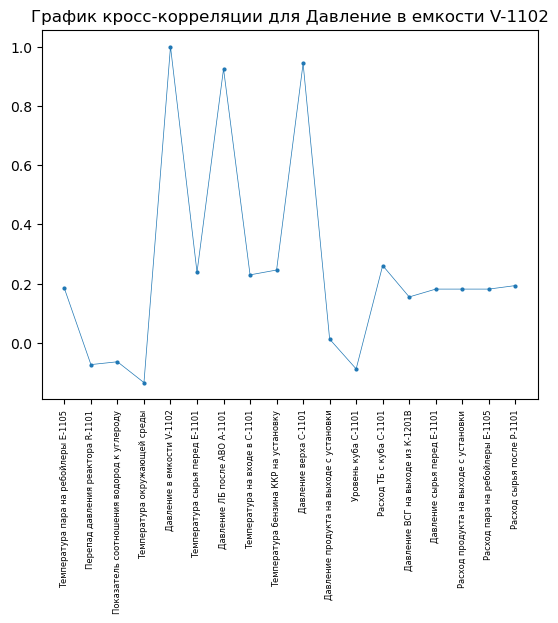

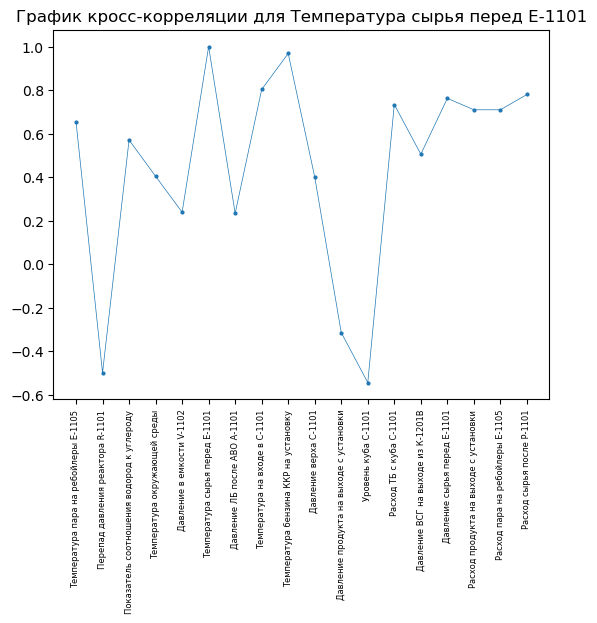

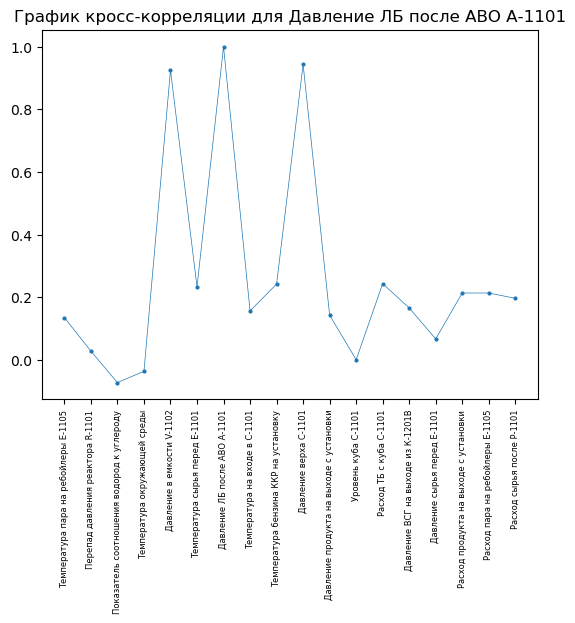

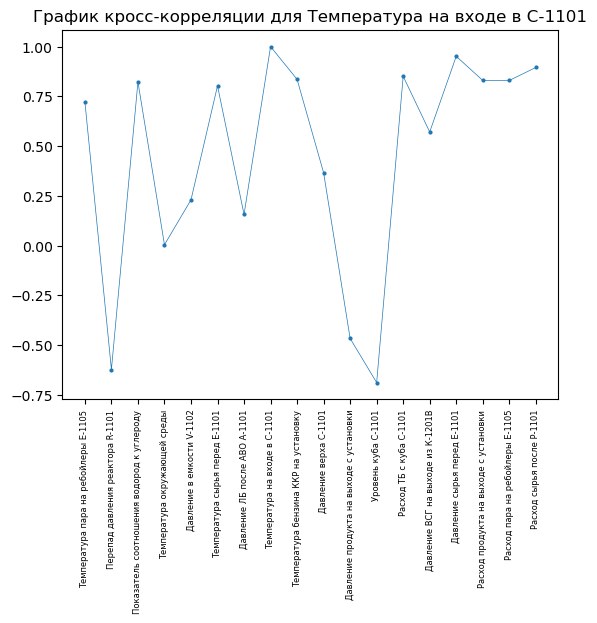

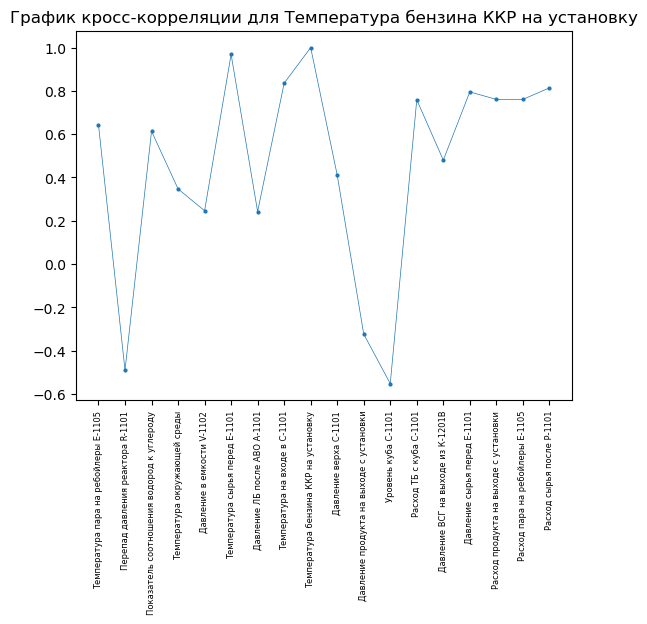

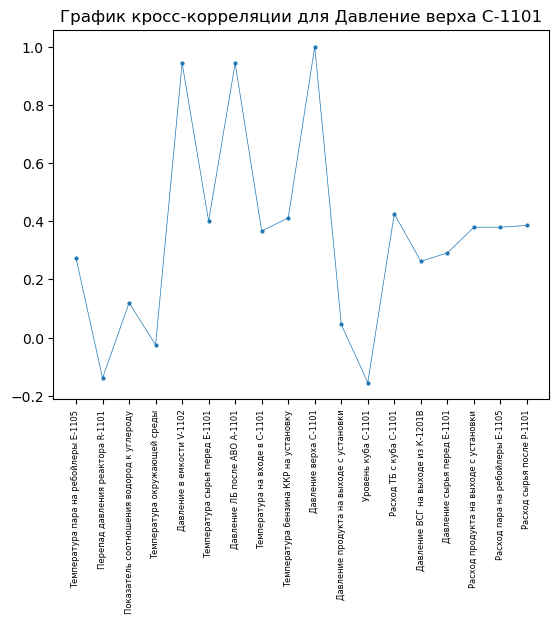

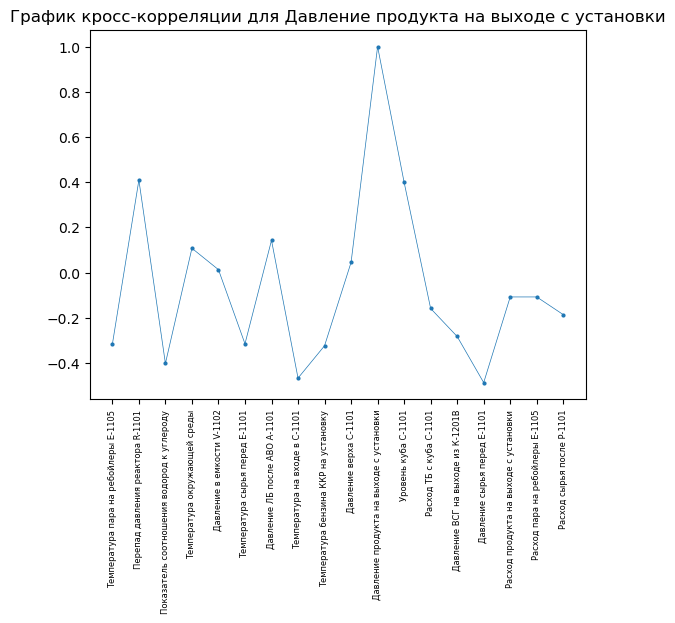

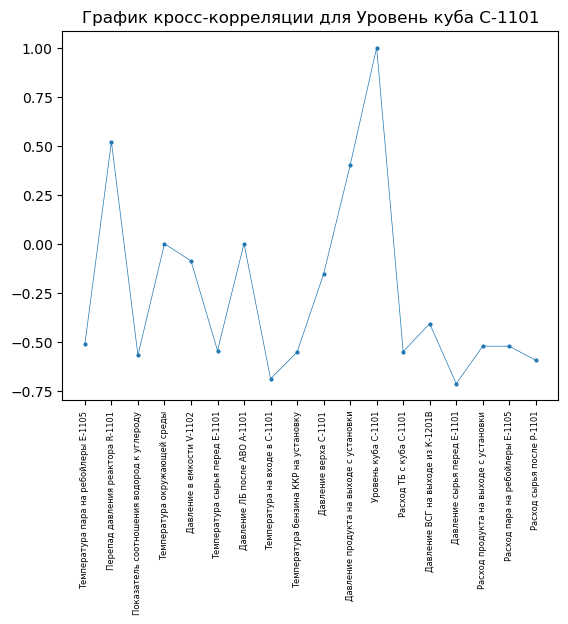

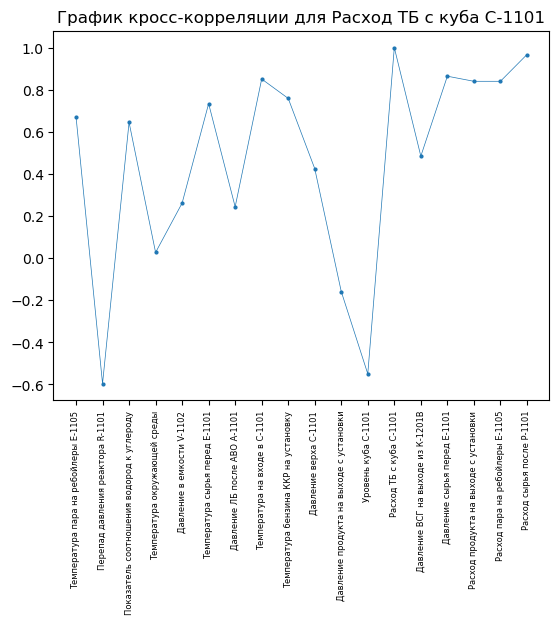

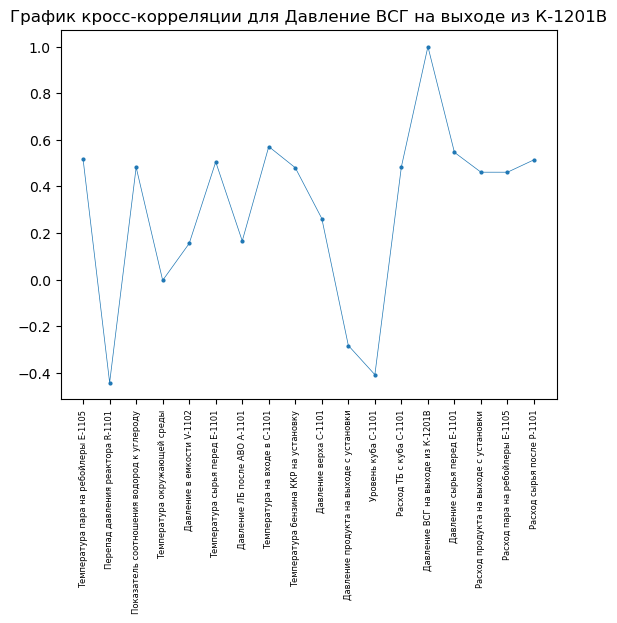

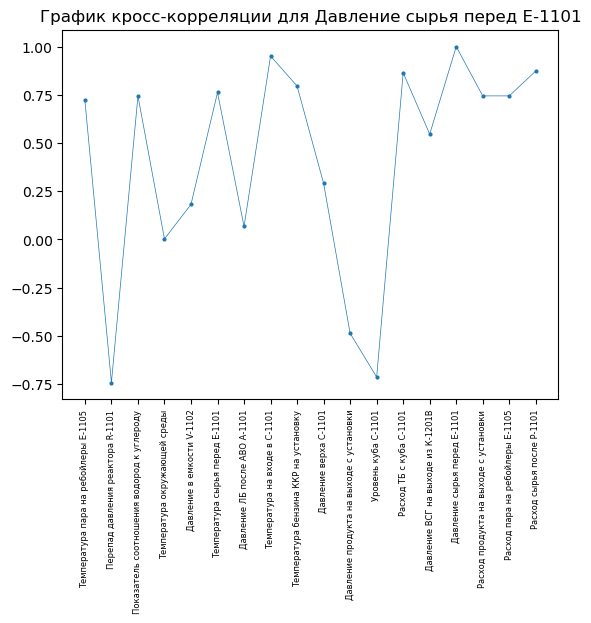

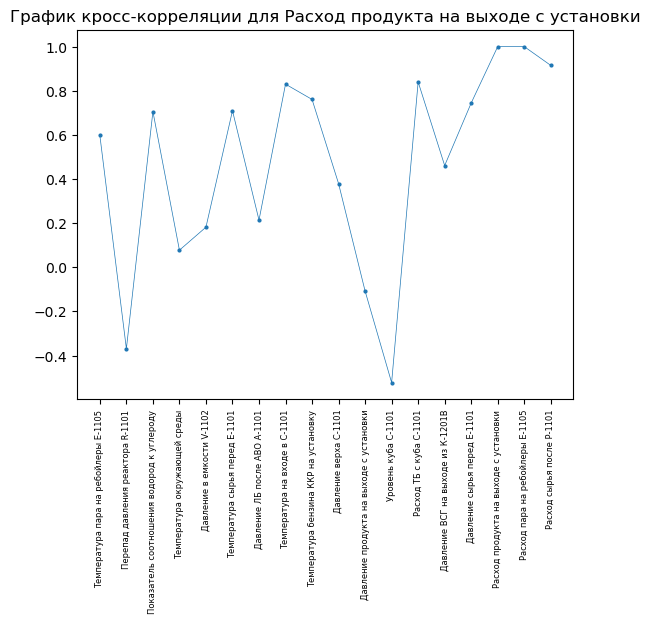

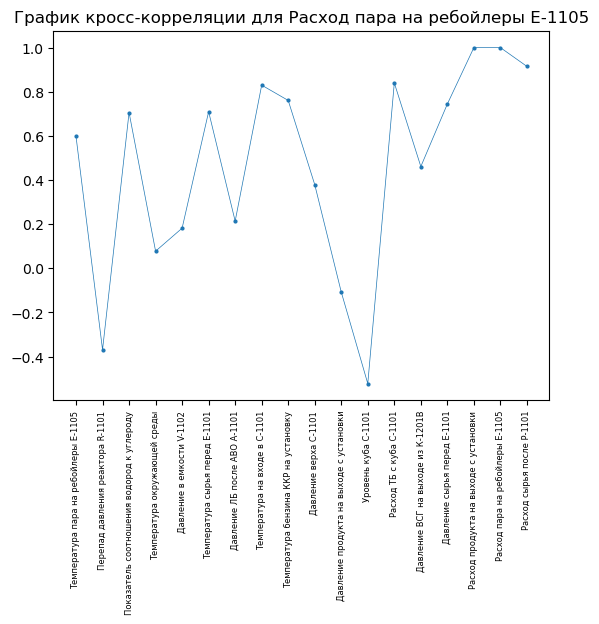

In [952]:
cross_corr_graph(test_viz.Cross_Corr(threshhold))